<a href="https://colab.research.google.com/github/nomchanz/graduation_thesis_new/blob/main/1000_seed(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
## 必要なライブラリのimport
import csv
import random
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, BatchNormalization
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
## データについて

### データフイルのpath
no_hole_path = 'no_hole_data.csv'
one_hole_size_path = 'one_hole_size_data.csv'
one_hole_position_path = 'one_hole_position_data.csv'
four_holes_size_path = 'four_holes_size_data.csv'
four_holes_position_path = 'four_holes_position_data.csv'
nine_holes_size_path = 'nine_holes_size_data.csv'
nine_holes_position_path = 'nine_holes_position_data.csv'
sixteen_holes_size_path = 'sixteen_holes_size_data.csv'
sixteen_holes_position_path = 'sixteen_holes_position_data.csv'
twentyfive_holes_size_path = 'twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = 'twentyfive_holes_position_data.csv'

#### 穴0データ
with open(no_hole_path) as f0:
  lst_f0 = list(csv.reader(f0))

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  lst_fs1 = list(csv.reader(fs1))
with open(four_holes_size_path) as fs2:
  lst_fs2 = list(csv.reader(fs2))
with open(nine_holes_size_path) as fs3:
  lst_fs3 = list(csv.reader(fs3))
with open(sixteen_holes_size_path) as fs4:
  lst_fs4 = list(csv.reader(fs4))
with open(twentyfive_holes_size_path) as fs5:
  lst_fs5 = list(csv.reader(fs5))

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  lst_fp1 = list(csv.reader(fp1))
with open(four_holes_position_path) as fp2:
  lst_fp2 = list(csv.reader(fp2))
with open(nine_holes_position_path) as fp3:
  lst_fp3 = list(csv.reader(fp3))
with open(sixteen_holes_position_path) as fp4:
  lst_fp4 = list(csv.reader(fp4))
with open(twentyfive_holes_position_path) as fp5:
  lst_fp5 = list(csv.reader(fp5))

n = 1000
a = 1

random.seed(a)

lst_fs1 = random.sample(lst_fs1, int(n/5))
lst_fs2 = random.sample(lst_fs2, int(n/5))
lst_fs3 = random.sample(lst_fs3, int(n/5))
lst_fs4 = random.sample(lst_fs4, int(n/5))
lst_fs5 = random.sample(lst_fs5, int(n/5))
lst_fp1 = random.sample(lst_fp1, int(n/5))
lst_fp2 = random.sample(lst_fp2, int(n/5))
lst_fp3 = random.sample(lst_fp3, int(n/5))
lst_fp4 = random.sample(lst_fp4, int(n/5))
lst_fp5 = random.sample(lst_fp5, int(n/5))

lst_f0 = [r[:-1] for r in lst_f0]
lst_x_fs1 = [r[0] for r in lst_fs1]
lst_x_fs2 = [r[0] for r in lst_fs2]
lst_x_fs3 = [r[0] for r in lst_fs3]
lst_x_fs4 = [r[0] for r in lst_fs4]
lst_x_fs5 = [r[0] for r in lst_fs5]
lst_x_fp1 = [r[0] for r in lst_fp1]
lst_x_fp2 = [r[0] for r in lst_fp2]
lst_x_fp3 = [r[0] for r in lst_fp3]
lst_x_fp4 = [r[0] for r in lst_fp4]
lst_x_fp5 = [r[0] for r in lst_fp5]
lst_y1 = [r[1:-1] for r in lst_fp1]
lst_y2 = [r[1:-1] for r in lst_fp2]
lst_y3 = [r[1:-1] for r in lst_fp3]
lst_y4 = [r[1:-1] for r in lst_fp4]
lst_y5 = [r[1:-1] for r in lst_fp5]

lst_x_fs = lst_x_fs1 + lst_x_fs2 + lst_x_fs3 + lst_x_fs4 + lst_x_fs5
lst_x_fp = lst_x_fp1 + lst_x_fp2 + lst_x_fp3 + lst_x_fp4 + lst_x_fp5
lst_x = lst_x_fs + lst_x_fp
lst_y = lst_y1 + lst_y2 + lst_y3 + lst_y4 + lst_y5

lst_f0 = np.array(lst_f0, dtype=float)
lst_x = np.array(lst_x, dtype=int)
lst_y = np.array(lst_y, dtype=float)

lst_x = lst_x.reshape(2,n)
lst_x = lst_x.T
lst_y = lst_y - lst_f0

### train用とtest用に分割(4:1)
x_train, x_test, y_train, y_test = train_test_split(lst_x, lst_y, train_size= 0.8, test_size=0.2)

x_train = x_train.reshape(int(n*0.8),2,1)
x_test = x_test.reshape(int(n*0.2),2,1)

In [8]:
x_train

array([[[ 3],
        [11]],

       [[ 5],
        [15]],

       [[ 3],
        [16]],

       ...,

       [[ 4],
        [ 8]],

       [[ 4],
        [ 4]],

       [[ 5],
        [ 4]]])

In [9]:
## CNN

### modelの作成
model = Sequential()
### 畳み込み層
model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(2, 1)))
### プーリング層
model.add(MaxPooling1D(2, padding='same'))
### 全結合層
model.add(Dense(50, activation='linear'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [10]:
# 学習
epochs = 4000
batch_size = 64
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
13/13 [==============================] - 0s 11ms/step - loss: 0.2637 - mae: 0.2275 - val_loss: 0.4046 - val_mae: 0.2637
Epoch 1502/4000
13/13 [==============================] - 0s 12ms/step - loss: 0.2700 - mae: 0.2381 - val_loss: 0.4045 - val_mae: 0.2635
Epoch 1503/4000
13/13 [==============================] - 0s 11ms/step - loss: 0.2046 - mae: 0.2186 - val_loss: 0.4047 - val_mae: 0.2638
Epoch 1504/4000
13/13 [==============================] - 0s 10ms/step - loss: 0.2256 - mae: 0.2225 - val_loss: 0.4047 - val_mae: 0.2638
Epoch 1505/4000
13/13 [==============================] - 0s 10ms/step - loss: 0.3804 - mae: 0.2562 - val_loss: 0.4046 - val_mae: 0.2636
Epoch 1506/4000
13/13 [==============================] - 0s 10ms/step - loss: 0.2935 - mae: 0.2353 - val_loss: 0.4047 - val_mae: 0.2638
Epoch 1507/4000
13/13 [==============================] - 0s 9ms/step - loss: 0.3014 - mae: 0.2303 - val_loss: 0.4046 - val_mae: 0.2637
Epoch 1508/4000
1

In [11]:
# モデルの評価
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.4048 - mae: 0.2638
Test loss: 0.40478065609931946
Test mae: 0.2637540400028229


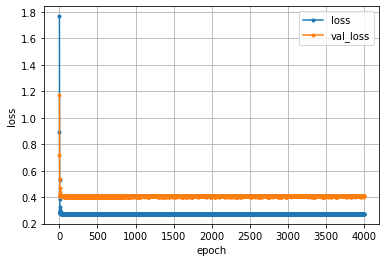

In [12]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

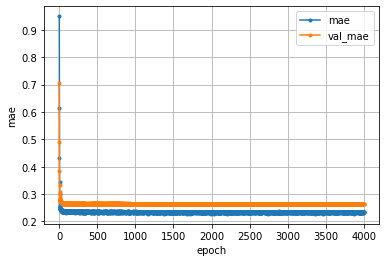

In [13]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [14]:
model.save(str(n)+"_random.seed("+str(a)+").h5")

In [15]:
## CNN

### modelの作成
model_BN = Sequential()
### 畳み込み層
model_BN.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(2, 1)))
### プーリング層
model_BN.add(MaxPooling1D(2, padding='same'))
### 全結合層
model_BN.add(Dense(50, activation='linear'))
### バッチ正規化層
model_BN.add(BatchNormalization(epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model_BN.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [16]:
# 学習
epochs = 4000
batch_size = 64
history = model_BN.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
13/13 [==============================] - 0s 9ms/step - loss: 0.2714 - mae: 0.2329 - val_loss: 0.4048 - val_mae: 0.2639
Epoch 1502/4000
13/13 [==============================] - 0s 7ms/step - loss: 0.3158 - mae: 0.2452 - val_loss: 0.4048 - val_mae: 0.2638
Epoch 1503/4000
13/13 [==============================] - 0s 12ms/step - loss: 0.2681 - mae: 0.2315 - val_loss: 0.4048 - val_mae: 0.2639
Epoch 1504/4000
13/13 [==============================] - 0s 10ms/step - loss: 0.2298 - mae: 0.2289 - val_loss: 0.4049 - val_mae: 0.2641
Epoch 1505/4000
13/13 [==============================] - 0s 11ms/step - loss: 0.3395 - mae: 0.2445 - val_loss: 0.4048 - val_mae: 0.2638
Epoch 1506/4000
13/13 [==============================] - 0s 10ms/step - loss: 0.2008 - mae: 0.2160 - val_loss: 0.4048 - val_mae: 0.2638
Epoch 1507/4000
13/13 [==============================] - 0s 10ms/step - loss: 0.2623 - mae: 0.2268 - val_loss: 0.4047 - val_mae: 0.2638
Epoch 1508/4000
13

In [17]:
# モデルの評価
score = model_BN.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.4048 - mae: 0.2637
Test loss: 0.4047721028327942
Test mae: 0.2637452483177185


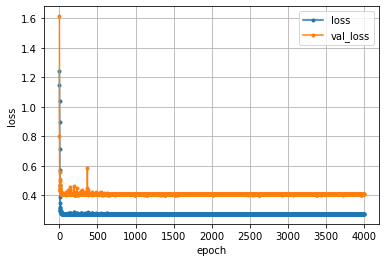

In [18]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

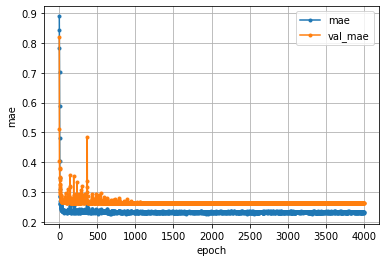

In [19]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [23]:
model_BN.save(str(n)+"_random.seed("+str(a)+")_BN.h5")

In [24]:
## CNN

### modelの作成
model_2 = Sequential()
### 畳み込み層
model_2.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(2, 1)))
### プーリング層
model_2.add(MaxPooling1D(2, padding='same'))
### 平滑化層
model_2.add(Flatten())
### 全結合層
model_2.add(Dense(50, activation='linear'))
### バッチ正規化層
model_2.add(BatchNormalization(epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model_2.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [25]:
# 学習
epochs = 4000
batch_size = 64
history = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
13/13 [==============================] - 0s 7ms/step - loss: 0.1137 - mae: 0.1560 - val_loss: 0.2832 - val_mae: 0.2093
Epoch 1502/4000
13/13 [==============================] - 0s 6ms/step - loss: 0.1401 - mae: 0.1600 - val_loss: 0.3069 - val_mae: 0.2496
Epoch 1503/4000
13/13 [==============================] - 0s 7ms/step - loss: 0.1219 - mae: 0.1597 - val_loss: 0.2856 - val_mae: 0.2038
Epoch 1504/4000
13/13 [==============================] - 0s 7ms/step - loss: 0.1614 - mae: 0.1693 - val_loss: 0.2832 - val_mae: 0.2020
Epoch 1505/4000
13/13 [==============================] - 0s 7ms/step - loss: 0.1511 - mae: 0.1621 - val_loss: 0.2877 - val_mae: 0.2177
Epoch 1506/4000
13/13 [==============================] - 0s 6ms/step - loss: 0.1143 - mae: 0.1615 - val_loss: 0.2942 - val_mae: 0.2253
Epoch 1507/4000
13/13 [==============================] - 0s 8ms/step - loss: 0.1381 - mae: 0.1642 - val_loss: 0.2861 - val_mae: 0.2080
Epoch 1508/4000
13/13 [

In [26]:
# モデルの評価
score = model_2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.2525 - mae: 0.1802
Test loss: 0.25248825550079346
Test mae: 0.1801508665084839


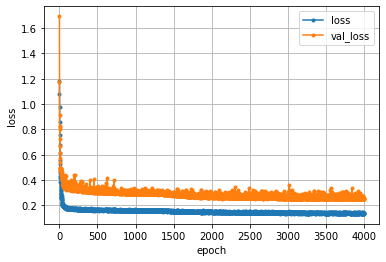

In [27]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

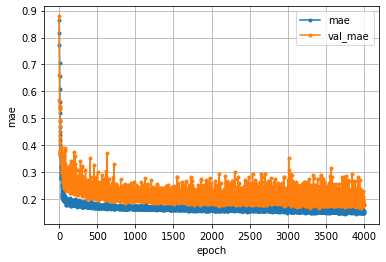

In [28]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [29]:
model_2.save(str(n)+"_random.seed("+str(a)+")_2.h5")